Extracting Sentinel-2 data

Location: Hong Kong

In [ ]:
pip install sentinelhub

In [75]:
#Generte a geodataframe form a set of points
import geopandas
import rasterio
import matplotlib.pyplot as plt
from shapely.geometry import Point

#create some sampling points
Points = [ 
          Point(1000, 100),
          Point(1000, 100),
          Point(1000, 100),
          Point(1000, 100)]

gdf = geopandas.GeoDataFrame([1,2,3,4], geometry=Points, crs=32630)
gdf.head()

,0,geometry
0,1,POINT (1000.000 100.000)
1,2,POINT (1000.000 100.000)
2,3,POINT (1000.000 100.000)
3,4,POINT (1000.000 100.000)


NameError: name 'HK' is not defined

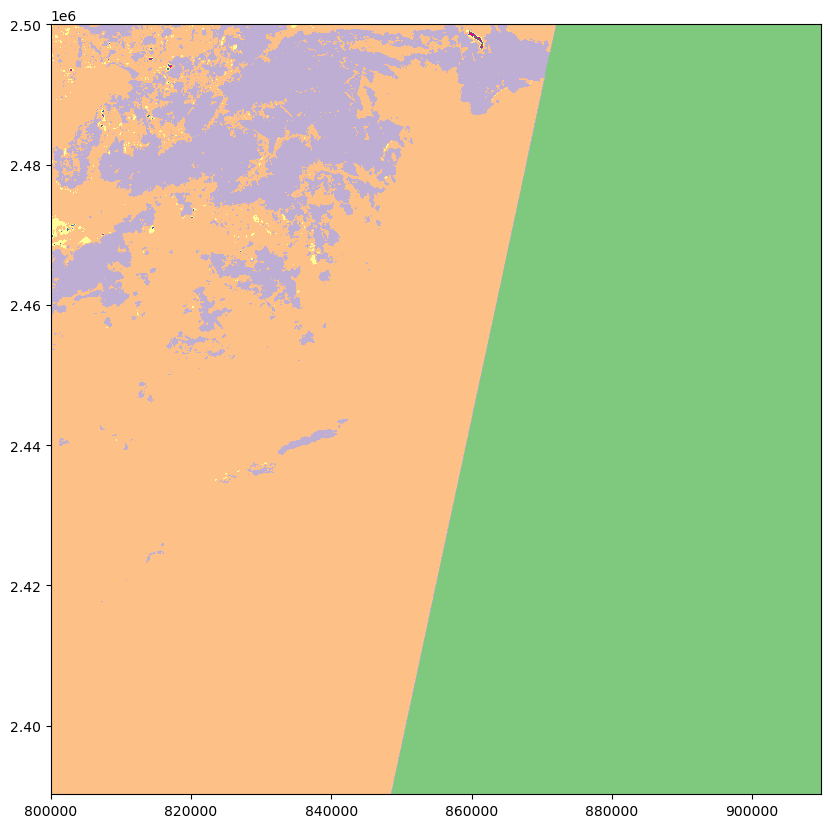

In [113]:
#use rasterio to open the raster data
src = rasterio.open("./L2A_T49QHE_A031375_20230310T030242/IMG_DATA/R60m/T49QHE_20230310T025539_B01_60m.jp2")

from rasterio.plot import show

#adjust figure size
fig, ax = plt.subplots(figsize=(50, 10))

#tranform rasterio plot to real world coords
extent = [src.bounds[0], src.bounds[2], src.bounds[1],src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='Accent')

HK.plot(alpha = .5, ax=ax)

#display a title
ax.set(title='sentinel 2')
ax.set_axis_off()
plt.axis('equal')
gdf.plot(ax=ax)

NameError: name 'HK' is not defined

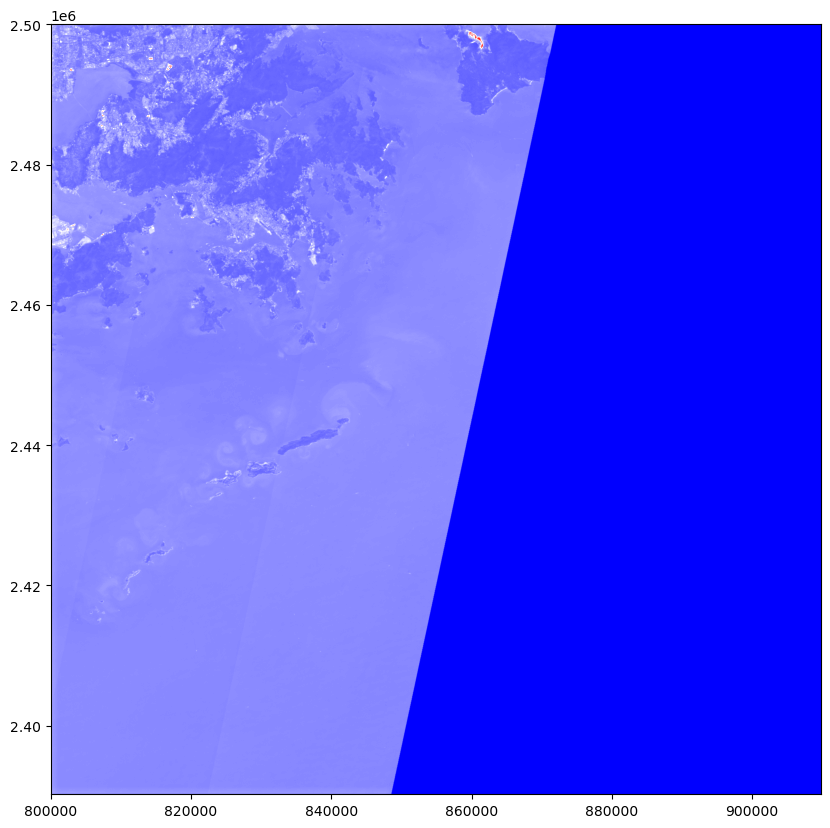

In [125]:
#use rasterio to open the raster data
src = rasterio.open("./L2A_T49QHE_A031375_20230310T030242/IMG_DATA/R60m/T49QHE_20230310T025539_B01_60m.jp2")

from rasterio.plot import show

fig, ax = plt.subplots(figsize=(50, 10))

extent = [src.bounds[1], src.bounds[2], src.bounds[1],src.bounds[3]]
ax = rasterio.plot.show(src, extent=extent, ax=ax, cmap='bwr')

HK.plot(alpha = .5, ax=ax)

ax.set(title='sentinel 2')
ax.set_axis_off()
plt.axis('equal')
gdf.plot(ax=ax)

In [ ]:
#Data Collect
from sentinelhub import DataCollection
for collection in DataCollection.get_available_collections():
    print(collection)

In [ ]:
#Sentinel2 Level2
DataCollection.SENTINEL2_L2A

In [115]:
#connect to the api
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import datetime
#import geopandas as gpd

#Authenticate with Copernicus Open Access Hub
api = SentinelAPI("hmlai", "JD09240310.lhm", "https://apihub.copernicus.eu/apihub")

# Search product using OpenSearch
footprint = geojson_to_wkt({
    "type": "Polygon",
    "coordinates": [[[7.05, 43.55], [7.9, 43.55], [7.9, 44.05], [7.05, 44.05], [7.05, 43.55]]]
})
        
products = api.query(footprint, 
                     date=('20230803','20230803'),
                     platformname='Sentinel-2', 
                     producttype='S2MSI2A',
                     orbitnumber='33461')

#convert to panadas DataFrame
products_df = api.to_dataframe(products)

# sort and limit to first 5 sorted products
products_df_sorted = products_df.sort_values(['cloudcoverpercentage', 'sensingdate'], descending=[True, True])
products_df_sorted = products_df_sorted.head()


TypeError: DataFrame.sort_values() got an unexpected keyword argument 'inscending'